In [151]:
%run NN_Package_Final.ipynb  

In [152]:
import pandas as pd
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.nan)

In [153]:
def conv(lists):
    output = []
    for a in lists:
        number = ord(a) - 96
        output.append(number)
    return output

In [154]:
data=pd.read_csv('mushrooms.csv')
for z in data:
    lists=[]
    lists=conv(data[z])
    data[z]=lists
data=data.drop('veil-type', axis =1)

In [155]:
lists=[]
for x in data['class']:
    if x==5:
        lists.append(0)
    else:
        lists.append(1)
data['class']=lists

In [156]:
Xdata=data.drop('class', axis =1)

In [157]:
Xtraindata, Xtestdata, Ytraindata, Ytestdata = sk.model_selection.train_test_split(Xdata,data[['class']], test_size=0.2,random_state=123, stratify=data['class'])

In [158]:
X_train_scales= sk.preprocessing.normalize(Xtraindata)
X_test_scales= sk.preprocessing.normalize(Xtestdata)

In [159]:
X=np.array(X_train_scales)
Y=np.array(Ytraindata)

In [160]:
Xt=np.array(Xtestdata)
Yt=np.array(Ytestdata)

In [161]:
test2=Nick_NN(momentum=0.5,Hidden_node_size=5, Hidden_layers=2, iterations=1000)

In [162]:
test2.Get_Parameters()

Hidden_node_size: 5
Output_node_size: 1
Hidden_layers: 2
iterations: 1000
alpha: 0.5
alpha_const: 0.001
momentum: 0.5


In [163]:
out=test2.Fit_NN(X,Y)

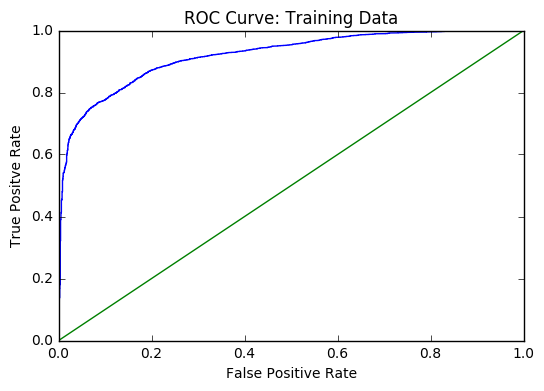

In [164]:
test2.ROC(Y,out,'ROC Curve: Training Data')

In [165]:
out2=test2.Score(Xt)

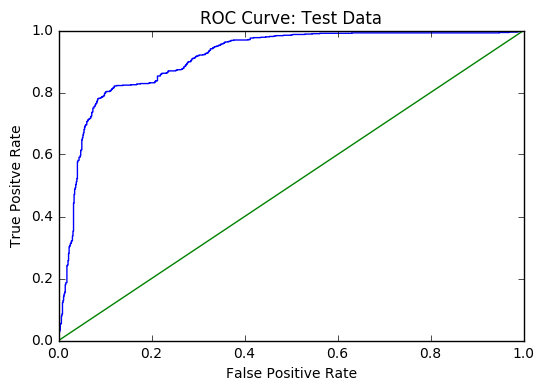

In [166]:
test2.ROC(Yt,out2,'ROC Curve: Test Data')
